<a href="https://colab.research.google.com/github/kelseypeltz/blackjackproject.github.io/blob/main/Milestone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ![image](https://user-images.githubusercontent.com/69976409/195754514-06dcba6c-7ea4-42da-a3d8-8f334194c1f8.png)
# Blackjack Project
Approach to Blackjack by Jack Johnson & Kelsey Peltz
<details open="open">
<summary>Table of Contents</summary>

- [The Game](#the-game)
- [Project Goals](#project-goals)
  - [Collaboration Plan](#collaboration-plan)
- [ETL](#etl)
 - [Dataset 1](#dataset-1)
 - [Datasets 2](#datasets-2)
   
   

---   

## The Game
Blackjack is the most popular casino banking game in the world. In blackjack, there is one deck of 52 cards, everyone plays against the dealer, players place bets, and each player is dealt two cards at a time (including the dealer). The players know one of the dealer's cards, while the other remains unknown until the round is done. After everyone is dealt, players can decide if they want to "hit," meaning they'd be dealt more cards (one at a time) to get a sum closest to 21 without "busting" (going over 21). If a player is satisfied with their hand, they do not "hit." The goal is to have a sum greater than the dealers.1 Players and dealers often use card counting as away to become an advantaged player. Card counting is a mathematical strategy used in blackjack that helps determine one’s probable advantage or disadvantage of the next dealt card. 

## Project Goals

The goal of the data science aspect of this project is to determine the best mathematical strategy to become an advantaged player in blackjack. In addition, we would like to determine the most logical betting amounts for a player to minimize their loses while maximizing their wins. 

We are partnering this project with our capstone project. The goal of our capstone project is to use reinforcement learning algorithms to teach a computer agent how to play blackjack with a win rate equal to or greater than that of the average professional player. 

Our ultimate goal for the future of this project is to build a blackjack strategy interface using the algorithms and results that we already have. The interface will be able to take in inputs of how many players there are so that users will not be locked into single player games of blackjack. The player's dealt hand and other known variables during the game will also be adjustable. As the game goes on, the user would be able to update inputs, and the interface would suggest the best moves according to a combination of card counting methods and the machine's learned behavior through reward systems. We will modify our algorithms to go further than previous work by having various non-traditional “modes” for alliances between players. This would also allow for the dealer's perspective to be used, which could aid casinos in determining if a player is cheating or colluding with another player. 

## Collaboration Plan 

We have set up a google colab to work on our code together. Since we are partnering this project with our Capstone project, we plan on meeting on a weekly to bi-weekly schedule our faculty mentor. We plan on dividing work by doing independent research and coding and discussing it during our scheduled meetings and throughout the week as needed. 

## ETL 
### (Extract, Transform, and Load)
We initially planned on finding datasets online but that has not be as easy as we once thought. We realized that we have to simulate the game with different strategies to produce our own data. We have pulled various blackjack simulation code and are continuing our research. We are hoping to somehow upload the data from [here](https://www.kaggle.com/datasets/mojocolors/900000-hands-of-blackjack-results) to get more insights the average player. The following graphs are based off of the datasets we created through simulation.

#### **Dataset 1**
This first dataset we are using was found in the article [The Statistics of Blackjack](https://towardsdatascience.com/the-statistics-of-blackjack-e3b5fc29e67d) but was original sourced from [this Github](https://gist.github.com/ArnaudBu/797094581de3f6703a6c12b994da18c6). As you can see the dataset is limited. It runs through each potential play (stand, hit, double) with various potential score combination of player and dealer. We can see that the majority of players seem as though they are winning because they have a higher score (244 having a higher score, 45 lower, and 11 equal). This is because we do not know the other card the dealer has or the dealer's next move. While this data is a good start, we believe that the addition of our card counting data with final outcomes will add immensely to this project.
Question: How will this data change the more players there are on the table?

In [ ]:
import pandas as pd
import numpy as np
strategy_df = pd.read_csv('blackjack_strategies.csv')
strategy_df.head()

,score,score_dealer,hard,decision,earn,earn_if_stand,earn_if_double,earn_if_hit,should_split
0,20,11,True,stand,0.105197,0.105197,-1.752715,-0.876357,False
1,20,10,True,stand,0.436742,0.436742,-1.709090,-0.854545,False
2,20,9,True,stand,0.759325,0.759325,-1.701164,-0.850582,False
3,20,8,True,stand,0.793192,0.793192,-1.702979,-0.851489,False
4,20,7,True,stand,0.773226,0.773226,-1.700020,-0.850010,True


In [ ]:
strategy_df['equation'] = strategy_df.score - strategy_df.score_dealer
strategy_df.loc[strategy_df['equation']<0, 'Outcome'] = 'Lower with known info'
strategy_df.loc[strategy_df['equation']>0, 'Outcome'] = 'Higher with known info'
strategy_df.loc[strategy_df['equation']==0, 'Outcome'] = 'Equal with known info'
strategy_df.Outcome.value_counts()

Higher with known info    244
Lower with known info      45
Equal with known info      11
Name: Outcome, dtype: int64

In the plot below, you can see that more players who scored below 16 were in the negatives for earnings than players above 16. This is likely due to the unknown dealer's card and/or next move getting them closer to 21. 

sixteen
above    AxesSubplot(0.125,0.125;0.775x0.755)
below    AxesSubplot(0.125,0.125;0.775x0.755)
Name: earn, dtype: object

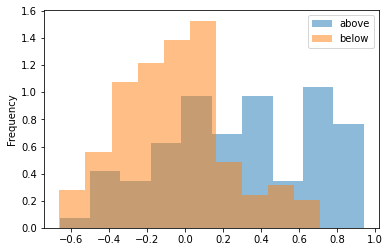

In [ ]:
strategy_df.loc[strategy_df['score']<=16, 'sixteen'] = 'below'
strategy_df.loc[strategy_df['score']>16, 'sixteen'] = 'above'
strategy_df.groupby('sixteen').earn.plot.hist(alpha=0.5, density=True, legend=True)

In the chart below we can see that players who had scores above the dealer's are pretty evenly spread out between negative and positive earnings. Players with equal and lower scores are mostly in the negatives with a few exceptions (due to busts). 

Outcome
Equal with known info     AxesSubplot(0.125,0.125;0.775x0.755)
Higher with known info    AxesSubplot(0.125,0.125;0.775x0.755)
Lower with known info     AxesSubplot(0.125,0.125;0.775x0.755)
Name: earn, dtype: object

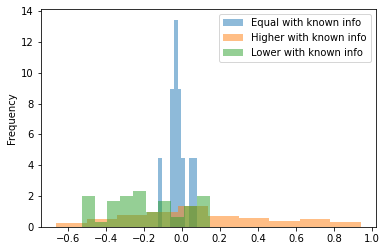

In [ ]:
strategy_df.groupby('Outcome').earn.plot.hist(alpha=0.5, density=True, legend=True)

#### **Datasets 2**

These data sets show what the basic, intuitive and slightly more advanced strategies suggests players due based on their hand. These strategies do not follow the counting card methods we will compare them too. We will use these strategies as a kind of control variable to see how much of a difference there is compared to counting card methods. From our research, the basic strategy produce a 42% win rate. Our goal is to find a combination of strategies that will produce a 50% or more win rate. 
Question: How big of a difference will card counting add to the winning outcomes compared to these strategies? 



Used more advanced strategy: 

In [ ]:
s_df = pd.read_csv('Strategy.csv')
s_df.head()

,Unnamed: 0,2,3,4,5,6,7,8,9,10,A
0,21.0,S,S,S,S,S,S,S,S,S,S
1,20.0,S,S,S,S,S,S,S,S,S,S
2,19.0,S,S,S,S,S,S,S,S,S,S
3,18.0,S,S,S,S,S,S,S,S,S,S
4,17.0,S,S,S,S,S,S,S,S,S,S


Uses normal, human intuition:

In [ ]:
human_df = pd.read_csv('Strategy_human.csv')
human_df.head()

,Unnamed: 0,2,3,4,5,6,7,8,9,10,A
0,17,S,S,S,S,S,S,S,S,S,S
1,16,S,S,S,S,S,H,H,Sr,Sr,H
2,15,S,S,S,S,S,H,H,H,Sr,H
3,14,S,S,S,S,S,H,H,H,H,H
4,13,S,S,S,S,S,H,H,H,H,H


Uses basic (by the book) strategy:

In [ ]:
basic_df = pd.read_csv('basicStrategy.csv')
basic_df.head()

,Unnamed: 0,2,3,4,5,6,7,8,9,10,A
0,17,S,S,S,S,S,S,S,S,S,S
1,16,S,S,S,S,S,H,H,Sr,Sr,H
2,15,S,S,S,S,S,H,H,H,Sr,H
3,14,S,S,S,S,S,H,H,H,H,H
4,13,S,S,S,S,S,H,H,H,H,H


In [ ]:
stands_df = pd.read_csv('always_stand.csv')
stands_df.head()

,0,2,3,4,5,6,7,8,9,10,A
0,21,S,S,S,S,S,S,S,S,S,S
1,20,S,S,S,S,S,S,S,S,S,S
2,19,S,S,S,S,S,S,S,S,S,S
3,18,S,S,S,S,S,S,S,S,S,S
4,17,S,S,S,S,S,S,S,S,S,S


Always hits:

In [ ]:
hits_df = pd.read_csv('always_hit.csv')
hits_df.head()

,0,2,3,4,5,6,7,8,9,10,A
0,21,H,H,H,H,H,H,H,H,H,H
1,20,H,H,H,H,H,H,H,H,H,H
2,19,H,H,H,H,H,H,H,H,H,H
3,18,H,H,H,H,H,H,H,H,H,H
4,17,H,H,H,H,H,H,H,H,H,H


Always hits under 17:

In [ ]:
hit17_df = pd.read_csv('hit_straight_under_17.csv')
hit17_df.head()

,0,2,3,4,5,6,7,8,9,10,A
0,21,S,S,S,S,S,S,S,S,S,S
1,20,S,S,S,S,S,S,S,S,S,S
2,19,S,S,S,S,S,S,S,S,S,S
3,18,S,S,S,S,S,S,S,S,S,S
4,17,S,S,S,S,S,S,S,S,S,S


Always stands on 16 and above: 

In [ ]:
stand16_df = pd.read_csv('stand_on_16.csv')
stand16_df.head()

,0,2,3,4,5,6,7,8,9,10,A
0,21,S,S,S,S,S,S,S,S,S,S
1,20,S,S,S,S,S,S,S,S,S,S
2,19,S,S,S,S,S,S,S,S,S,S
3,18,S,S,S,S,S,S,S,S,S,S
4,17,S,S,S,S,S,S,S,S,S,S


#### **Datasets 3**

The dataset below we found from a simular project to ours where she had to produce her own dataset. This dataset can be found [here](https://https://github.com/jocelyn-ong/data-science-projects/blob/master/others/blackjack/blackjack_data.csv).
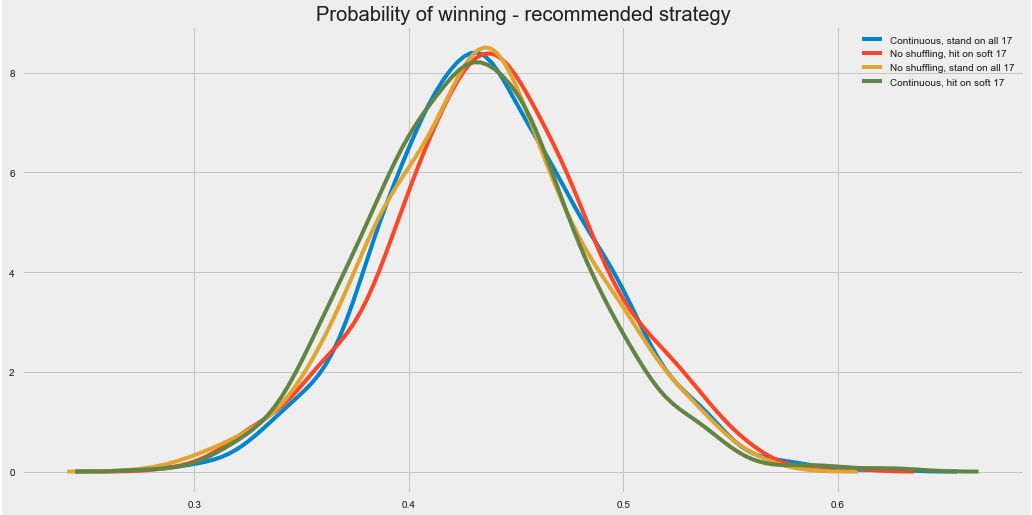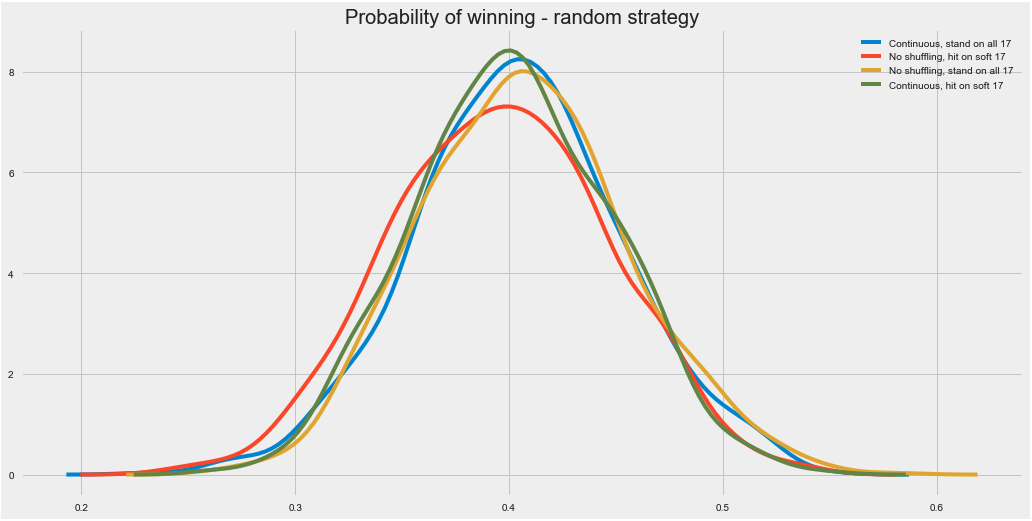

The goal of our project is to use reinforcement learning algorithms to teach a computer agent how to play blackjack with a win rate equal to or greater than that of the average professional player. Our research began with Edward O. Thorp’s book, Beat the Dealer, which details Blackjack's basic rules, proven winning strategies, how to overcome casino countermeasures, and how to spot cheating. Thorp revolutionized the point system that both amateur and professional blackjack players have successfully used for the past 60 years. The following graphs show the relative value of every possible hand after the first blackjack deal based on Thorp’s predictions.
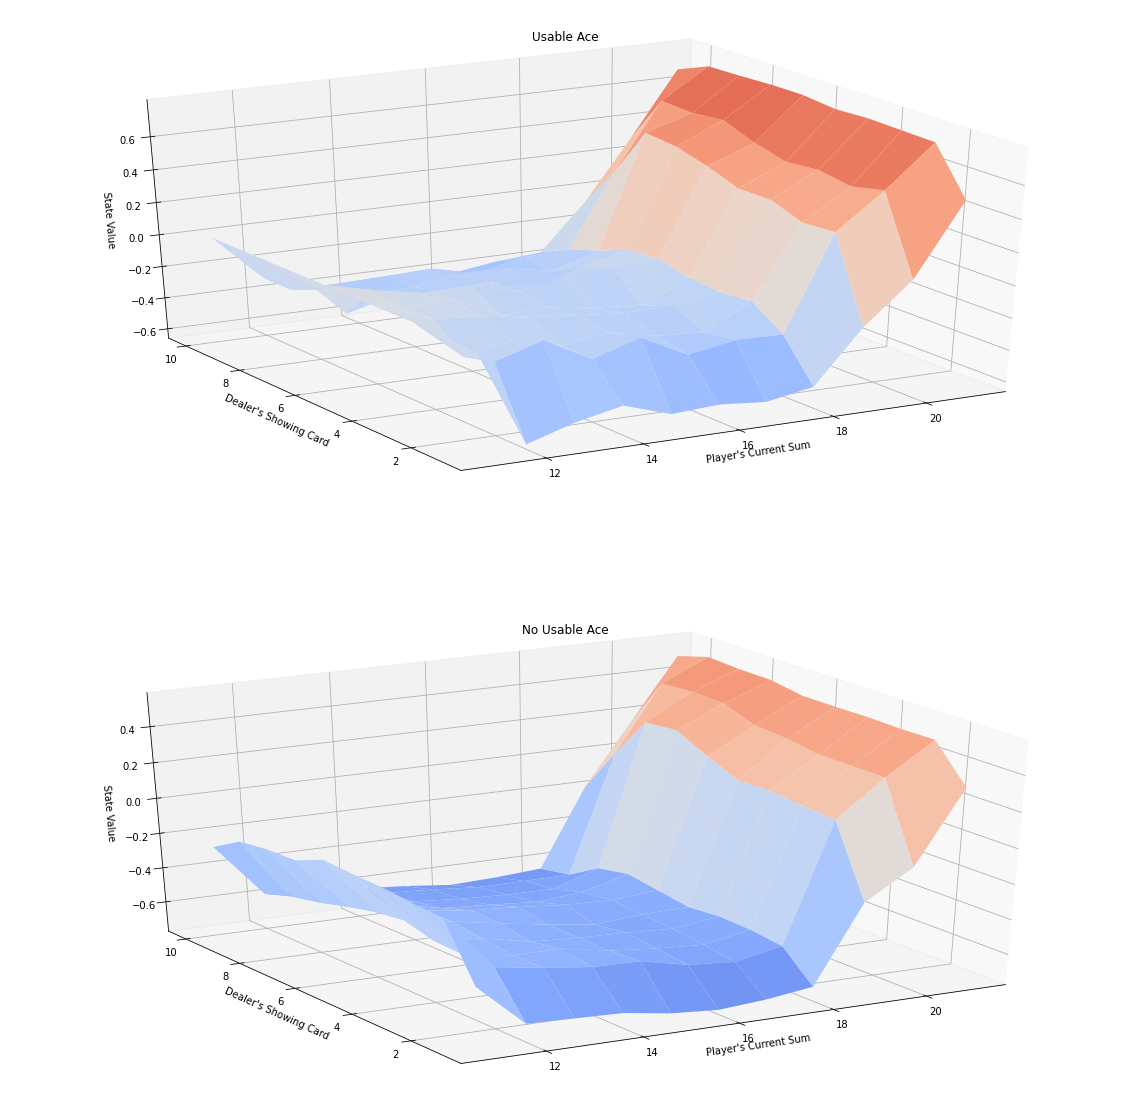


RL Card, a toolkit for Reinforcement Learning in card games, has made testing our algorithms much easier as it is a pre-existing interface for implementing reinforcement learning and searching algorithms into card games. The Deepmind course "Intro to Reinforcement Learning" by David Silver helped us begin learning how to properly use RL Card to the best of our advantage.
Using what we learned from Thorp’s book and Silver’s course we started testing different algorithms on the blackjack environment. There have been numerous machine learning algorithms that cater to the game of blackjack due to its well-defined rules and reward system partnered with its small state space and action space. By utilizing previous work and doing our own research, we found that machine learning produces a higher winning rate on its own without bringing in card counting. The baseline for our testing was an agent that made random choices for each blackjack hand. From there, we replaced the random agent with a deep q-learning agent. Each agent ran through 1000 hands of blackjack, and logged their average reward from each hand throughout their 300000 timesteps.



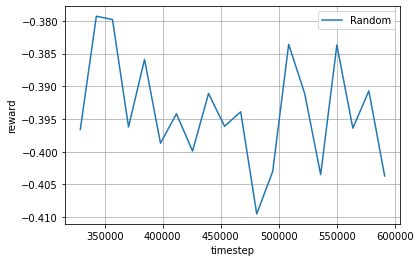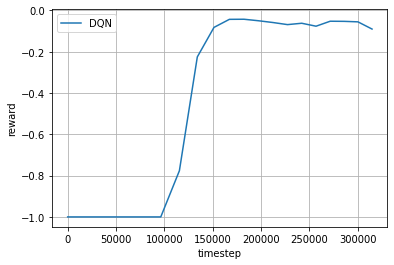


Moving forward, we hope to incorporate a card counting strategy into our interface, as right now it is just reinforcement learning where the agent is not aware if more high cards have been played than low cards. Card counting is a mathematical strategy used in blackjack that helps determine one’s probable advantage or disadvantage of the next dealt card. Players often use card counting as a way to gain a slight advantage over the casino. By adding a card counting feature, the reinforcement learning algorithm will be able to outperform the average player who just uses basic strategy. The process of card counting will help players determine what the optimal bet amount is per hand. Because players have to bet no matter what, this will help minimize losses when a player is less likely to win even if they are using strategy.